In [150]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [151]:
DATA_DIR = '../../data'
BASE_DATASET =  f'{DATA_DIR}/hydropower_efficiency.csv'
SEED = 1

ATTRIBUTES = [
    "altitude_m",
    "nearest_lake_dist_km",
    "days_of_rain",
    "inches_of_rain",
    "avg_high_temp",
    "avg_low_temp"
]

In [152]:
base_df = pd.read_csv(BASE_DATASET)
base_df.drop('plant_id', axis=1, inplace=True)
base_df.drop('type', axis=1, inplace=True)
base_df = base_df[base_df['gwh_per_mm3'] < 10] 

In [153]:
X, y = base_df.drop('gwh_per_mm3', axis=1), base_df['gwh_per_mm3']
X = X[ATTRIBUTES]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)
y_train, y_val, y_test = np.log(y_train), np.log(y_val), np.log(y_test)

In [154]:
scaler = preprocessing.MinMaxScaler()
X_train[ATTRIBUTES] = scaler.fit_transform(X_train[ATTRIBUTES])
X_val[ATTRIBUTES] = scaler.transform(X_val[ATTRIBUTES])

In [155]:
y_scaler = preprocessing.MinMaxScaler()
y_scaler.fit(np.array(y_train).reshape(-1, 1))

MinMaxScaler(copy=True, feature_range=(0, 1))

In [156]:
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [157]:
components = pd.DataFrame(pca.transform(X_train), columns = ['component1', 'component2'])
components['efficiency'] = y_scaler.transform(np.array(y_train).reshape(-1, 1))

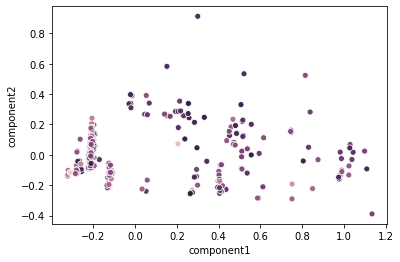

In [158]:
plt = sns.scatterplot(data=components, x='component1', y='component2', hue="efficiency")
plt.legend([],[], frameon=False)

In [159]:
components['efficiency'].describe()

count    387.000000
mean       0.699866
std        0.163730
min        0.000000
25%        0.600520
50%        0.701075
75%        0.817864
max        1.000000
Name: efficiency, dtype: float64

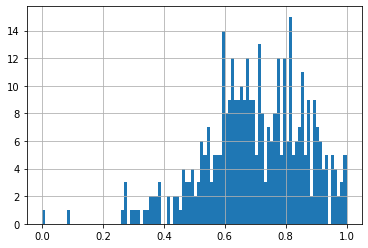

In [161]:
components['efficiency'].hist(bins=100)